In [ ]:
import numpy as np
import pandas as pd

pd.set_option("display.max_columns", None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/Deloitte Backup/Financial Data Clustering Paper/"

In [ ]:
es600 = pd.read_csv(f"{path}230507_es600_final.csv")

# 1. Data Pre-Processing

In [ ]:
es600.shape[0]

7801

In [ ]:
#filtering for derivedEmissions in the STOXX600 dataset
es600 = es600.loc[es600.derivedEmissions.notna()]

In [ ]:
es600.shape[0]

6239

In [ ]:
#applying condition that 80% at least for one column must be non-null and drop the rest of columns
cond = es600.count() < es600.shape[0] * 0.8
drop_columns = es600.count()[cond].index.to_list()
es600 = es600.drop(columns = drop_columns)
drop_columns

['Environmental Expenditures',
 'Environmental Provisions',
 'CO2e Indirect Emissions, Scope 3',
 'Environmental R&D Expenditures',
 'Direct Energy/Energy Purchased Direct',
 'Direct Energy/Energy Produced Direct',
 'Indirect Energy Use',
 'researchAndDevelopment',
 'shortTermInvestments',
 'rnd/sales',
 'capex/fixedAssets',
 'sga/sales']

In [ ]:
def filter_numeric_df(data: pd.DataFrame):

  df_numeric = data.select_dtypes(include = "number")
  df_numeric = df_numeric.drop(columns = ["Emission Reduction Processes/Policy Emissions Reduction",
                                          "Emission Reduction Objectives/Targets Emissions Reduction",
                                          "BusTRBCId",
                                          "econId"])

  return df_numeric

In [ ]:
def remove_outliers(data: pd.DataFrame, variables: list):

    df = data.copy()

    for col in variables:

        Q1 = df[col].quantile(0.05)
        Q3 = df[col].quantile(0.95)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5*IQR
        upper_bound = Q3 + 1.5*IQR

        df = df[(df[col] >= lower_bound) &
                (df[col] <= upper_bound)]

    return df

In [ ]:
def encode_categorical_variables(data: pd.DataFrame, variables: list):

  end_encoded_df = pd.DataFrame()

  for variable in variables:

    encoded_df = pd.get_dummies(data[[variable]].copy())
    end_encoded_df = pd.concat([end_encoded_df,encoded_df], axis = 1)

  data = data.drop(columns = variables)
  data = pd.concat([data, end_encoded_df], axis=1)

  return data

In [ ]:
data = encode_categorical_variables(data = es600.copy(), variables = ["econIdDesc","IncomeGroup"])

In [ ]:
for year, df in data.groupby("FisYear"):
  print(year,len(df))

2009 411
2010 425
2011 446
2012 450
2013 473
2014 490
2015 493
2016 507
2017 510
2018 520
2019 532
2020 539
2021 443


In [ ]:
data.head()

,OrgId,econId,OrgName_x,FisYear,Id_A4,OrgName_y,BusTRBCId,Emission Reduction Processes/Policy Emissions Reduction,Emission Reduction Objectives/Targets Emissions Reduction,derivedEmissions,CO2 Equivalents Emission Total,CO2 Equivalents Emission Direct,CO2 Equivalents Emission Indirect,emissionIntensity,Energy Use Total,ESG SCORE,ESG Combined Score,ESG Controversies Score,Resource Use Score,Emissions Score,Environmental Innovation Score,Workforce Score,Human Rights Score,Community Score,Product Responsibility Score,Management Score,Shareholders Score,CSR Strategy Score,totalRevenue,totalAssets,employees,grossProfit,operatingIncome,earningsBeforeTax,propertyPlantEquipmentTotal,totalDebt,totalLiabilities,commonStock,netIncome,ebitda,enterpriseValue,totalAssets/commonEquity,ebit/interest,grossMargin,cf/sales,operatingMargin,roa,cogs/sales,sales/employee,totalAssets/employee,capex/totalAssets,capex/totalSales,capex,ISOCountryCodeDerived,Region,GDP PPP,econIdDesc_Basic Materials,econIdDesc_Consumer Cyclicals,econIdDesc_Consumer Non-Cyclicals,econIdDesc_Energy,econIdDesc_Financials,econIdDesc_Healthcare,econIdDesc_Industrials,econIdDesc_Real Estate,econIdDesc_Technology,econIdDesc_Utilities,IncomeGroup_High income,IncomeGroup_Upper middle income
0,49048.0,54.0,Homeserve plc,2009,@STHST1,Homeserve plc,5420.0,1.0,0.0,13014.387,13014.387,4840.62,8173.767,17.559931,NaN,0.184400,0.184400,1.000000,0.196429,0.351852,0.000000,0.472973,0.000000,0.256757,0.100000,0.143082,0.209119,0.255906,741.141122,716.710039,5512.0,118.581777,118.581777,-36.038605,93.755374,79.207299,405.648795,11.697758,-50.569492,151.565244,773.669096,2.32973,-3.90851,15.99989,15.00036,15.99989,-5.63080,79.54975,93875.36284,90020.86357,0.70601,0.78560,5.822381,GBR,Europe & Central Asia,35043.594501,0,0,1,0,0,0,0,0,0,0,1,0
1,10836.0,54.0,Siemens AG,2009,@SIEME18,Siemens AG,5440.0,1.0,1.0,2574000.000,2574000.000,1115000.00,1459000.000,22.943176,23800000.0,0.883080,0.774873,0.666667,0.925000,0.977273,0.775000,0.982143,0.807692,0.875000,0.613636,0.993506,0.967532,0.951613,112190.219438,138938.419204,405000.0,30452.697364,8699.934304,5695.061302,40153.768119,28743.154418,94182.936171,4014.791352,3354.685300,12719.116605,63156.422093,3.43898,6.69693,27.14381,9.35539,7.75463,2.97482,69.27372,189261.72840,226259.25926,3.19614,3.81339,4278.248313,DEU,Europe & Central Asia,36842.916198,0,0,1,0,0,0,0,0,0,0,1,0
3,13731.0,56.0,Novartis AG,2009,@NOVAR21,Novartis AG,5620.0,1.0,1.0,1509000.000,1509000.000,574000.00,935000.000,32.585547,17000000.0,0.802761,0.535996,0.269231,0.833333,0.932692,0.289474,0.953333,0.907407,0.979730,0.627119,0.750000,0.371622,0.897727,46308.874191,95562.239409,99834.0,33423.736201,9296.924683,10073.150419,25915.522755,13981.374496,33448.034542,957.573563,8787.461161,11667.446944,125060.547931,1.58381,18.47550,72.17566,25.98550,20.07590,11.16311,22.70540,480394.98708,943431.89995,2.62346,4.26277,1974.040382,CHE,Europe & Central Asia,51796.538248,0,0,0,0,0,1,0,0,0,0,1,0
4,10364.0,56.0,Bayer AG,2009,@BAYER64,Bayer AG,5620.0,1.0,1.0,8100000.000,8100000.000,4570000.00,3530000.000,181.513567,77300000.0,0.744693,0.449270,0.153846,0.774510,0.778846,0.789474,0.980000,0.907407,0.925676,0.677966,0.396104,0.616883,0.951613,44624.763411,73079.349782,108400.0,23172.863058,5338.993287,2677.371265,35127.970042,17809.530033,44586.106178,3031.013352,1945.747352,9147.446529,55963.197332,2.65079,3.29448,51.92826,12.60588,11.96419,3.84692,39.53735,287527.67528,462103.32103,3.06689,5.05326,2255.005210,DEU,Europe & Central Asia,36842.916198,0,0,0,0,0,1,0,0,0,0,1,0
5,11024.0,57.0,Indra Sistemas SA,2009,@INDRA1,Indra Sistemas SA,5720.0,1.0,1.0,34246.000,34246.000,1925.00,32321.000,9.517167,363015.0,0.799542,0.799542,1.000000,0.789855,0.993243,0.725490,0.988189,0.833333,0.948413,0.782828,0.750000,0.945652,0.225000,3598.339732,3564.381501,25271.0,2376.638043,395.805673,373.320050,447.561980,288.347158,2071.333246,46.998604,280.035853,455.994984,2856.325698,2.63819,10.79762,66.04818,10.15

In [ ]:
data.to_excel("capstone_dataset.xlsx")

In [ ]:
data_numeric = filter_numeric_df(data = data)

In [ ]:
data_numeric = data_numeric.set_index(["OrgId","FisYear"])

In [ ]:
data_numeric.columns

Index(['derivedEmissions', 'CO2 Equivalents Emission Total',
       'CO2 Equivalents Emission Direct', 'CO2 Equivalents Emission Indirect',
       'emissionIntensity', 'Energy Use Total', 'ESG SCORE',
       'ESG Combined Score', 'ESG Controversies Score', 'Resource Use Score',
       'Emissions Score', 'Environmental Innovation Score', 'Workforce Score',
       'Human Rights Score', 'Community Score', 'Product Responsibility Score',
       'Management Score', 'Shareholders Score', 'CSR Strategy Score',
       'totalRevenue', 'totalAssets', 'employees', 'grossProfit',
       'operatingIncome', 'earningsBeforeTax', 'propertyPlantEquipmentTotal',
       'totalDebt', 'totalLiabilities', 'commonStock', 'netIncome', 'ebitda',
       'enterpriseValue', 'totalAssets/commonEquity', 'ebit/interest',
       'grossMargin', 'cf/sales', 'operatingMargin', 'roa', 'cogs/sales',
       'sales/employee', 'totalAssets/employee', 'capex/totalAssets',
       'capex/totalSales', 'capex', 'GDP PPP', 'econId

# SVD

In [ ]:
svd_features = ['derivedEmissions', 'emissionIntensity', 'Energy Use Total', 'ESG SCORE',
                'ESG Combined Score', 'ESG Controversies Score', 'Resource Use Score',
                'Emissions Score', 'Environmental Innovation Score', 'Workforce Score',
                'Human Rights Score', 'Community Score', 'Product Responsibility Score',
                'Management Score', 'Shareholders Score', 'CSR Strategy Score',
                'totalRevenue', 'totalAssets', 'employees', 'grossProfit',
                'operatingIncome', 'earningsBeforeTax', 'propertyPlantEquipmentTotal',
                'totalDebt', 'totalLiabilities', 'commonStock', 'netIncome', 'ebitda',
                'enterpriseValue', 'totalAssets/commonEquity', 'ebit/interest',
                'grossMargin', 'cf/sales', 'operatingMargin', 'roa', 'cogs/sales',
                'sales/employee', 'totalAssets/employee', 'capex/totalAssets',
                'capex/totalSales', 'capex', 'GDP PPP']

In [ ]:
svd_features = ['derivedEmissions', 'emissionIntensity', 'Energy Use Total', 'ESG SCORE',
                'ESG Combined Score', 'ESG Controversies Score', 'Resource Use Score',
                'Emissions Score', 'Environmental Innovation Score', 'Workforce Score',
                'Human Rights Score', 'Community Score', 'Product Responsibility Score',
                'Management Score', 'Shareholders Score', 'CSR Strategy Score']

In [ ]:
data_numeric = data_numeric.dropna(axis = 0)

In [ ]:
for year,df in data_numeric.groupby("FisYear"):
  print("Year",year,len(df))

Year 2009 217
Year 2010 232
Year 2011 262
Year 2012 272
Year 2013 265
Year 2014 260
Year 2015 276
Year 2016 285
Year 2017 311
Year 2018 323
Year 2019 342
Year 2020 369
Year 2021 306


In [ ]:
data_numeric

,,derivedEmissions,CO2 Equivalents Emission Total,CO2 Equivalents Emission Direct,CO2 Equivalents Emission Indirect,emissionIntensity,Energy Use Total,ESG SCORE,ESG Combined Score,ESG Controversies Score,Resource Use Score,Emissions Score,Environmental Innovation Score,Workforce Score,Human Rights Score,Community Score,Product Responsibility Score,Management Score,Shareholders Score,CSR Strategy Score,totalRevenue,totalAssets,employees,grossProfit,operatingIncome,earningsBeforeTax,propertyPlantEquipmentTotal,totalDebt,totalLiabilities,commonStock,netIncome,ebitda,enterpriseValue,totalAssets/commonEquity,ebit/interest,grossMargin,cf/sales,operatingMargin,roa,cogs/sales,sales/employee,totalAssets/employee,capex/totalAssets,capex/totalSales,capex,GDP PPP,econIdDesc_Basic Materials,econIdDesc_Consumer Cyclicals,econIdDesc_Consumer Non-Cyclicals,econIdDesc_Energy,econIdDesc_Financials,econIdDesc_Healthcare,econIdDesc_Industrials,econIdDesc_Real Estate,econIdDesc_Technology,econIdDesc_Utilities,IncomeGroup_High income,IncomeGroup_Upper middle income
OrgId,FisYear,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10836.0,2009,2574000.0,2574000.0,1115000.0,1459000.0,22.943176,2.380000e+07,0.883080,0.774873,0.666667,0.925000,0.977273,0.775000,0.982143,0.807692,0.875000,0.613636,0.993506,0.967532,0.951613,112190.219438,138938.419204,405000.0,30452.697364,8699.934304,5695.061302,40153.768119,28743.154418,94182.936171,4014.791352,3354.685300,12719.116605,63156.422093,3.43898,6.69693,27.14381,9.35539,7.75463,2.97482,69.27372,1.892617e+05,2.262593e+05,3.19614,3.81339,4278.248313,36842.916198,0,0,1,0,0,0,0,0,0,0,1,0
13731.0,2009,1509000.0,1509000.0,574000.0,935000.0,32.585547,1.700000e+07,0.802761,0.535996,0.269231,0.833333,0.932692,0.289474,0.953333,0.907407,0.979730,0.627119,0.750000,0.371622,0.897727,46308.874191,95562.239409,99834.0,33423.736201,9296.924683,10073.150419,25915.522755,13981.374496,33448.034542,957.573563,8787.461161,11667.446944,125060.547931,1.58381,18.47550,72.17566,25.98550,20.07590,11.16311,22.70540,4.803950e+05,9.434319e+05,2.62346,4.26277,1974.040382,51796.538248,0,0,0,0,0,1,0,0,0,0,1,0
10364.0,2009,8100000.0,8100000.0,4570000.0,3530000.0,181.513567,7.730000e+07,0.744693,0.449270,0.153846,0.774510,0.778846,0.789474,0.980000,0.907407,0.925676,0.677966,0.396104,0.616883,0.951613,44624.763411,73079.349782,108400.0,23172.863058,5338.993287,2677.371265,35127.970042,17809.530033,44586.106178,3031.013352,1945.747352,9147.446529,55963.197332,2.65079,3.29448,51.92826,12.60588,11.96419,3.84692,39.53735,2.875277e+05,4.621033e+05,3.06689,5.05326,2255.005210,36842.916198,0,0,0,0,0,1,0,0,0,0,1,0
11024.0,2009,34246.0,34246.0,1925.0,32321.0,9.517167,3.630150e+05,0.799542,0.799542,1.000000,0.789855,0.993243,0.725490,0.988189,0.833333,0.948413,0.782828,0.750000,0.945652,0.225000,3598.339732,3564.381501,25271.0,2376.638043,395.805673,373.320050,447.561980,288.347158,2071.333246,46.998604,280.035853,455.994984,2856.325698,2.63819,10.79762,66.04818,10.15849,10.99967,8.83069,32.27912,9.945182e+04,9.727593e+04,1.18409,1.14450,41.182838,32116.004470,0,0,0,0,0,0,0,0,1,0,1,0
148692.0,2009,430000.0,430000.0,44000.0,386000.0,264.560941,3.530000e+06,0.669425,0.669425,1.000000,0.932990,0.631313,0.547619,0.948113,0.770000,0.266990,0.804348,0.543478,0.195652,0.921053,1625.334408,2095.157635,5275.0,871.154616,312.445914,311.868735,2025.896225,425.957668,959.462913,125.055323,229.717008,420.955455,34327.632300,1.85697,8.61321,53.59848,23.55587,19.22348,13.00458,39.72538,1.601517e+06,2.052701e+06,10.23638,11.94366,194.124339,40361.096388,1,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114672164.0,2016,11065.0,11065.0,944.0,10121.0,5.748062,2.916000e+05,0.370628,0.370628,1.000000,0.258772,0.099138,0.148810,0.395425,0.000000,0.068627,0.45

In [ ]:
len(data_numeric)

3720

In [ ]:
# Importing required modules
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
data_numeric_scaled = scaler.fit_transform(data_numeric)

# Creating array
A = data_numeric_scaled

# Fitting the SVD class
trun_svd =  TruncatedSVD(n_components = 2)
A_transformed = trun_svd.fit_transform(A)

# Printing the transformed matrix
print("Transformed Matrix:")
print(A_transformed)

Transformed Matrix:
[[ 5.93023012 -1.75280703]
 [ 4.0904995  -4.10308056]
 [ 3.09451609 -1.04470784]
 ...
 [-4.00841297  0.03855664]
 [-0.61253729  1.57966324]
 [-2.19695666  1.21116103]]


In [ ]:
svd_df = pd.DataFrame(data = A_transformed, index = data_numeric.index, columns = ["SVD_1","SVD_2"])

<Axes: xlabel='SVD_1', ylabel='SVD_2'>

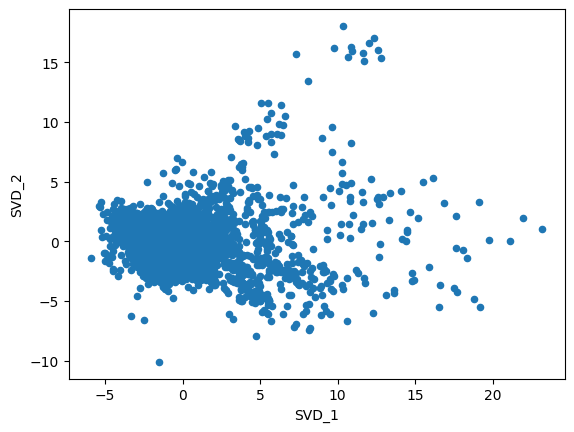

In [ ]:
svd_df.plot(kind = "scatter", x = "SVD_1", y = "SVD_2")

In [ ]:
def run_svd(data: pd.DataFrame, n_components: int):
  from sklearn.decomposition import TruncatedSVD
  from sklearn.preprocessing import StandardScaler

  # Scale the data
  scaler = StandardScaler()
  data_scaled = scaler.fit_transform(data)

  # Creating array
  A = data_scaled

  # Fitting the SVD class
  trun_svd =  TruncatedSVD(n_components = n_components)
  A_transformed = trun_svd.fit_transform(A)

  return pd.DataFrame(data = A_transformed, index = data.index, columns = [f"SVD_{i+1}" for i in range(n_components)])

In [ ]:
test_2018 = data_numeric.loc[data_numeric.index.get_level_values('FisYear') == 2018, svd_features]

In [ ]:
svd_2018 = run_svd(data = test_2018.copy(), n_components = 2)

<Axes: xlabel='SVD_1', ylabel='SVD_2'>

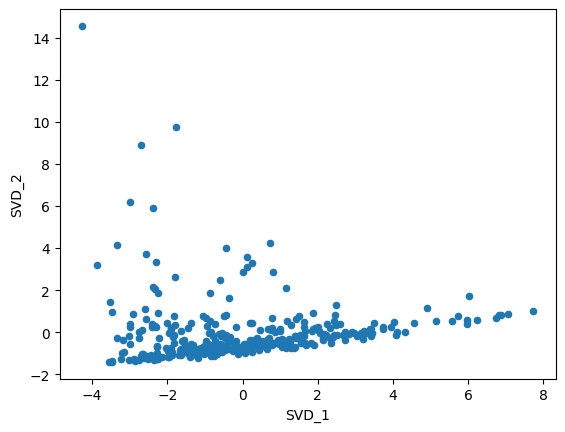

In [ ]:
svd_2018.plot(kind = "scatter", x = "SVD_1", y = "SVD_2")

In [ ]:
# Calculating maximal eucledian distance between SVD1 and SVD2
np.sqrt(abs(svd_2018["SVD_1"]**2 - svd_2018["SVD_2"]**2)).max()

13.911406332913076

# Affinity Propagation

In [ ]:
import numpy as np

from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets import make_blobs

In [ ]:
for i in range(45):
  af = AffinityPropagation(preference=-50, random_state=i).fit(svd_2018.values)
  cluster_centers_indices = af.cluster_centers_indices_
  labels = af.labels_

  n_clusters_ = len(cluster_centers_indices)

  print("Estimated number of clusters: %d" % n_clusters_)
  print(i)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


Estimated number of clusters: 22
0
Estimated number of clusters: 8
1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


Estimated number of clusters: 128
2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


Estimated number of clusters: 8
3
Estimated number of clusters: 8
4


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


Estimated number of clusters: 24
5


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


Estimated number of clusters: 137
6
Estimated number of clusters: 8
7


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


Estimated number of clusters: 81
8
Estimated number of clusters: 8
9


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


Estimated number of clusters: 50
10


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


Estimated number of clusters: 87
11


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


Estimated number of clusters: 80
12


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


Estimated number of clusters: 50
13


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


Estimated number of clusters: 136
14
Estimated number of clusters: 8
15
Estimated number of clusters: 8
16


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


Estimated number of clusters: 57
17


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


Estimated number of clusters: 8
18
Estimated number of clusters: 8
19


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


Estimated number of clusters: 122
20


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


Estimated number of clusters: 7
21


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


Estimated number of clusters: 250
22
Estimated number of clusters: 8
23


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


Estimated number of clusters: 240
24


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


Estimated number of clusters: 8
25


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


Estimated number of clusters: 227
26


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


Estimated number of clusters: 51
27
Estimated number of clusters: 7
28


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


Estimated number of clusters: 103
29


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


Estimated number of clusters: 5
30


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


Estimated number of clusters: 6
31


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


Estimated number of clusters: 5
32


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


Estimated number of clusters: 25
33


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


Estimated number of clusters: 180
34


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


Estimated number of clusters: 14
35


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


Estimated number of clusters: 66
36


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


Estimated number of clusters: 50
37


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


Estimated number of clusters: 52
38


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


Estimated number of clusters: 86
39


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


Estimated number of clusters: 9
40


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


Estimated number of clusters: 81
41


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


Estimated number of clusters: 6
42


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


Estimated number of clusters: 147
43
Estimated number of clusters: 38
44


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


In [ ]:
af = AffinityPropagation(preference=-50, random_state=32).fit(svd_2018.values)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print("Estimated number of clusters: %d" % n_clusters_)

print(
    "Silhouette Coefficient: %0.3f"
    % metrics.silhouette_score(svd_2018, labels, metric="sqeuclidean")
)

Estimated number of clusters: 5
Silhouette Coefficient: 0.675


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


In [ ]:
min([3,4,1])

1

<Figure size 640x480 with 0 Axes>

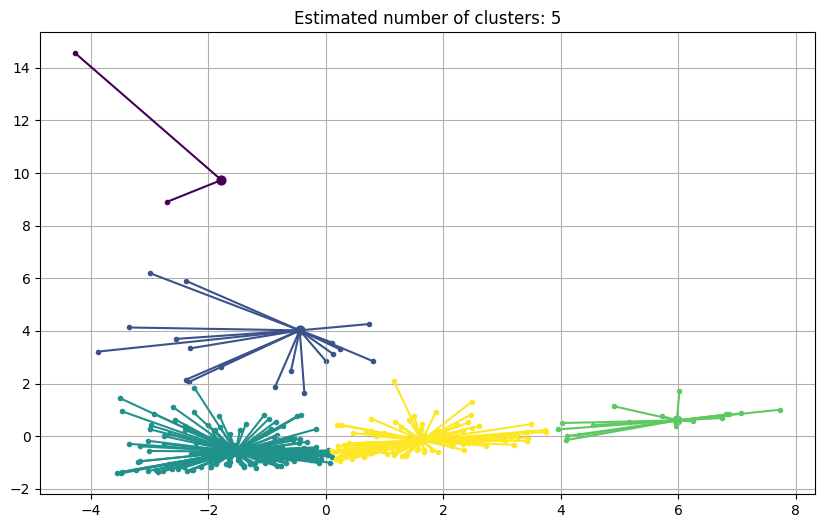

In [ ]:
import matplotlib.pyplot as plt

plt.figure(1)
plt.clf()
plt.figure(figsize=(10,6))

X = svd_2018.values

colors = plt.cycler("color", plt.cm.viridis(np.linspace(0, 1, 5)))

for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.scatter(
        X[class_members, 0], X[class_members, 1], color=col["color"], marker=".",
    )
    plt.scatter(
        cluster_center[0], cluster_center[1], s=40, color=col["color"], marker="o",
    )
    for x in X[class_members]:
      x_values = [cluster_center[0], x[0]]
      y_values = [cluster_center[1], x[1]]
      plt.plot(x_values, y_values, color=col["color"])

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.grid()
plt.show()

# SVD + AffinityPropagation Year by Year (ESG Data)

In [ ]:
def run_and_plot_af(data: pd.DataFrame, random_state: int, year: int):

  af = AffinityPropagation(preference=-50, random_state=random_state).fit(data.values)
  cluster_centers_indices = af.cluster_centers_indices_
  labels = af.labels_

  n_clusters_ = len(cluster_centers_indices)


  import matplotlib.pyplot as plt

  plt.figure()
  plt.clf()
  plt.figure(figsize = (10,6))

  X = data.values

  colors = plt.cycler("color", plt.cm.viridis(np.linspace(0,1,n_clusters_)))

  for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.scatter(
        X[class_members, 0], X[class_members, 1], color=col["color"], marker=".",
    )
    plt.scatter(
        cluster_center[0], cluster_center[1], s=40, color=col["color"], marker="o",
    )
    for x in X[class_members]:
      x_values = [cluster_center[0], x[0]]
      y_values = [cluster_center[1], x[1]]
      plt.plot(x_values, y_values, color=col["color"])

  plt.title(f"Estimated number of clusters: {n_clusters_} ({year})")
  plt.grid()
  plt.show()

  return labels

In [ ]:
def find_best_af(data: pd.DataFrame):
  clusters_list = []

  for i in range(45):

    af = AffinityPropagation(preference=-50, random_state=32).fit(svd_2018.values)
    cluster_centers_indices = af.cluster_centers_indices_
    labels = af.labels_

    n_clusters_ = len(cluster_centers_indices)

    clusters_list.append(n_clusters_)

  return clusters_list.index(min(clusters_list))

In [ ]:
import warnings
warnings.filterwarnings('ignore')

<Figure size 640x480 with 0 Axes>

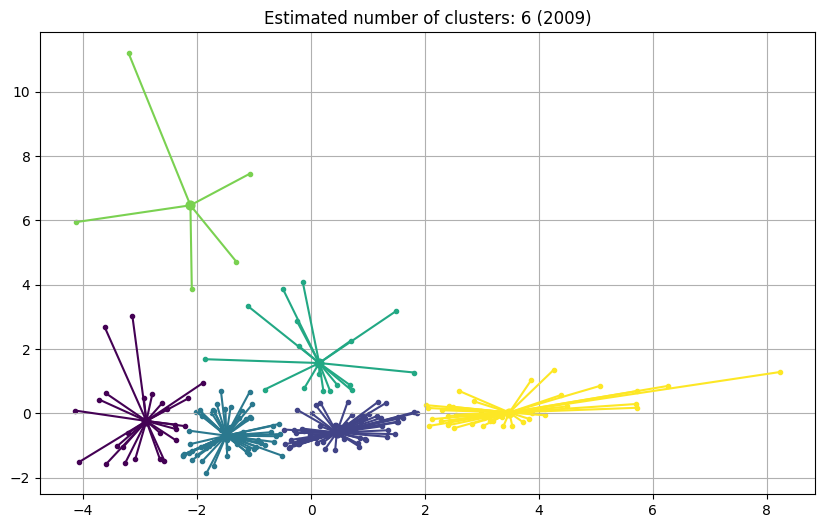

<Figure size 640x480 with 0 Axes>

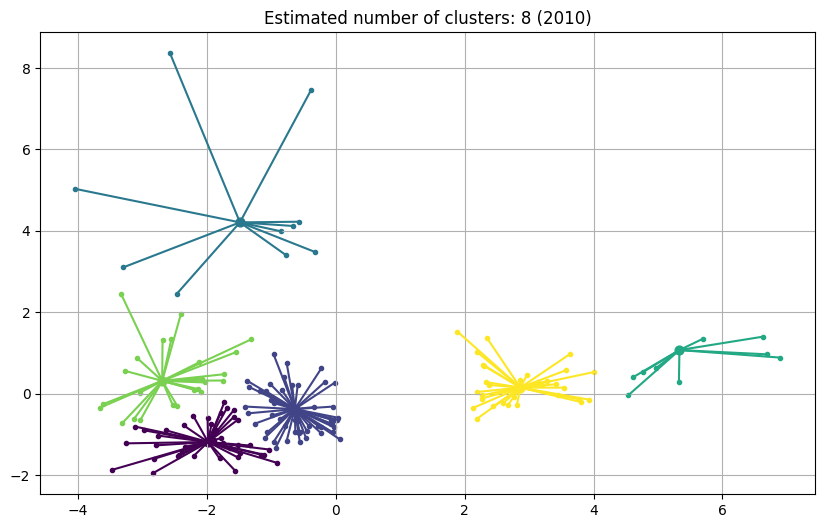

<Figure size 640x480 with 0 Axes>

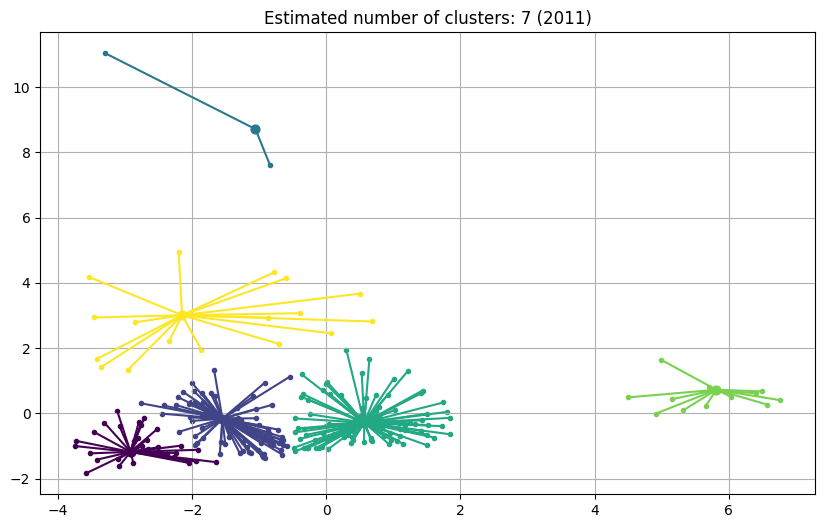

<Figure size 640x480 with 0 Axes>

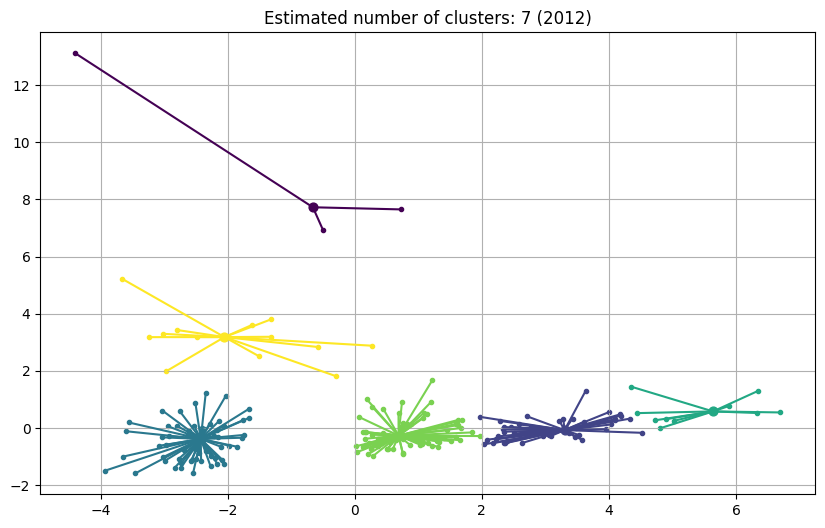

<Figure size 640x480 with 0 Axes>

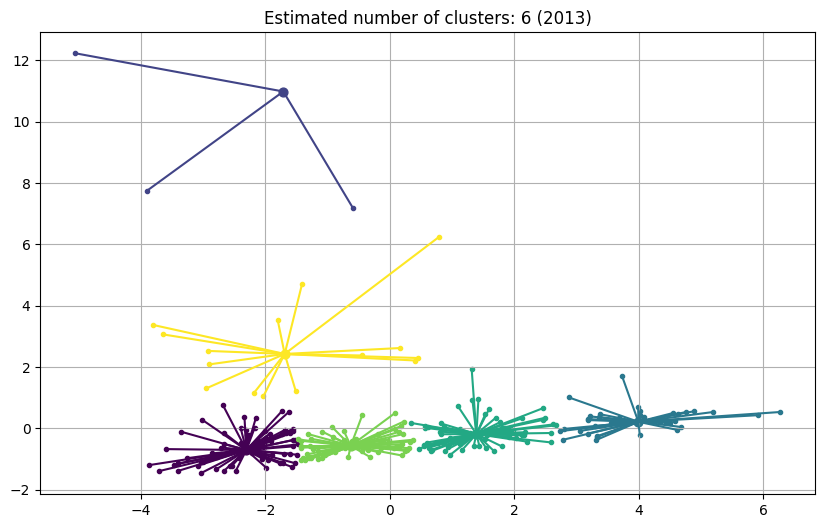

<Figure size 640x480 with 0 Axes>

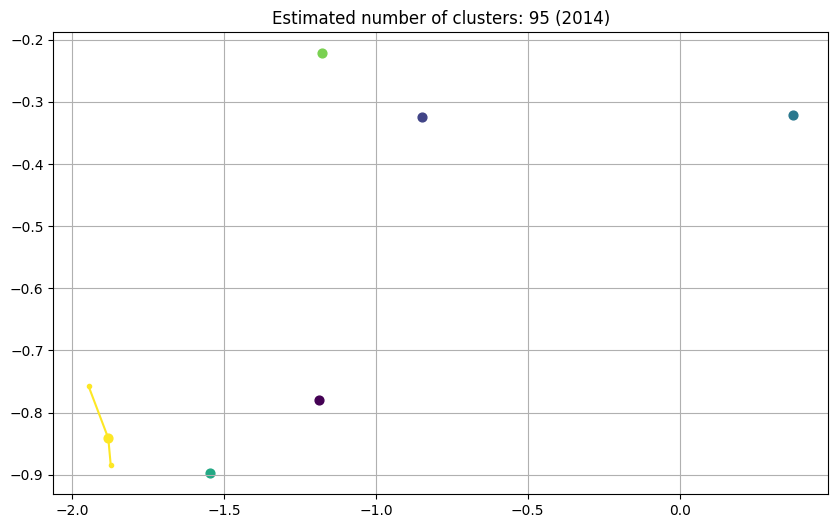

<Figure size 640x480 with 0 Axes>

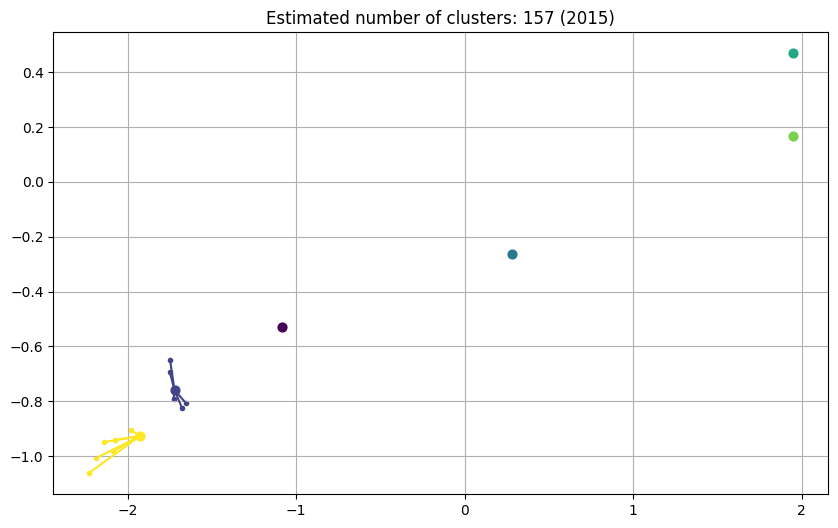

<Figure size 640x480 with 0 Axes>

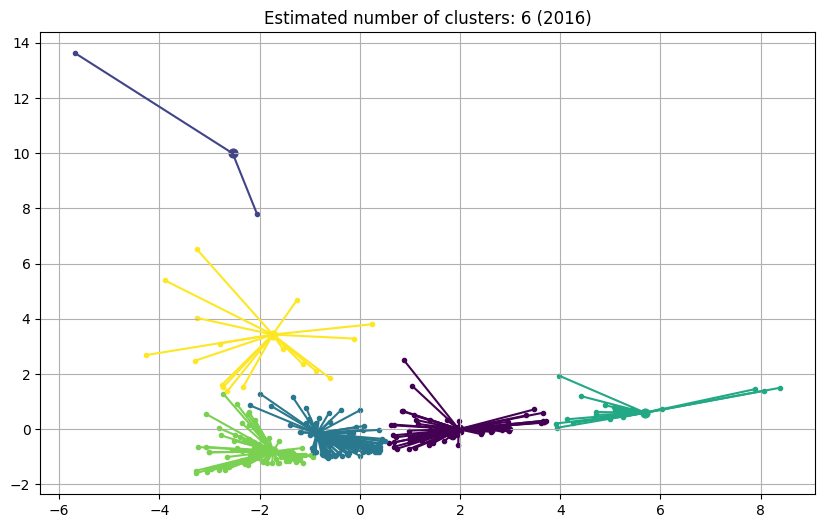

<Figure size 640x480 with 0 Axes>

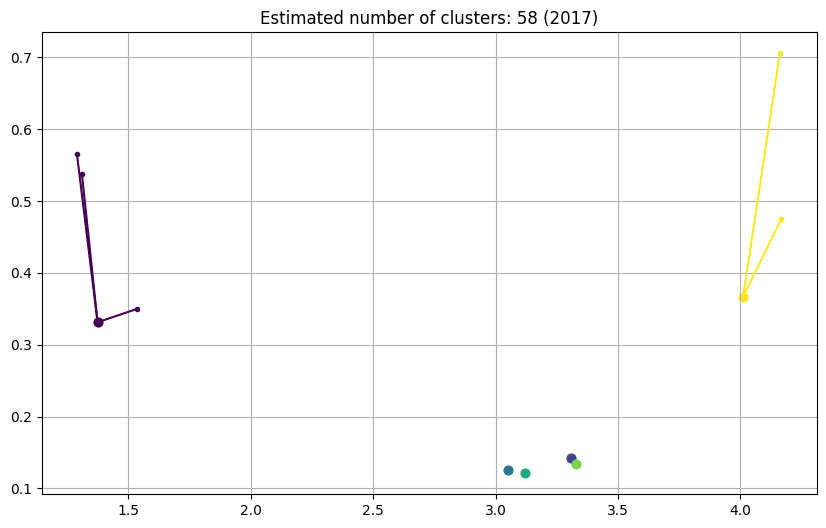

<Figure size 640x480 with 0 Axes>

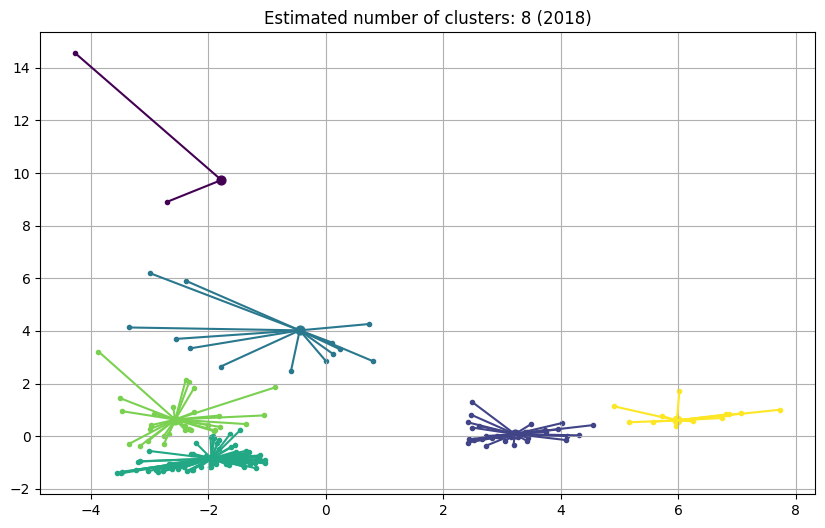

<Figure size 640x480 with 0 Axes>

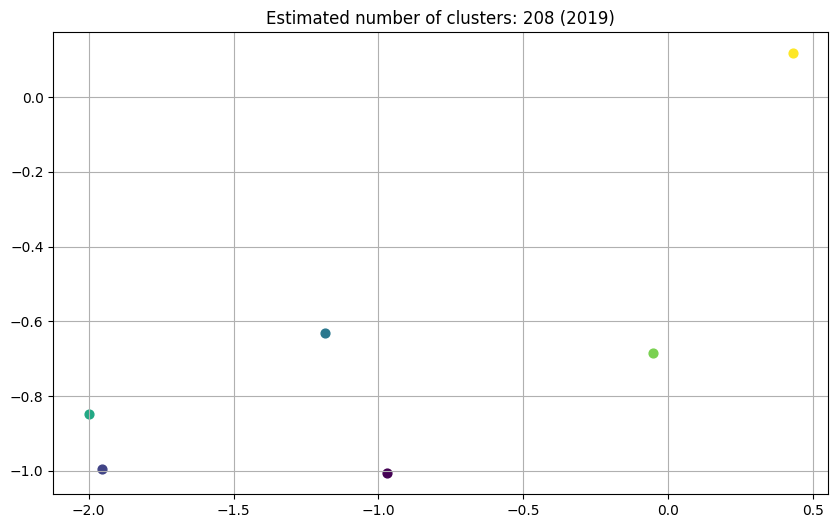

<Figure size 640x480 with 0 Axes>

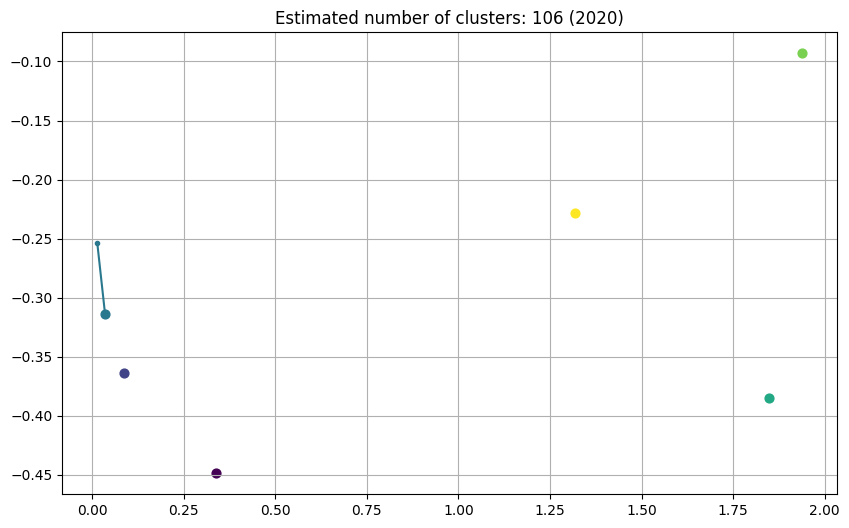

<Figure size 640x480 with 0 Axes>

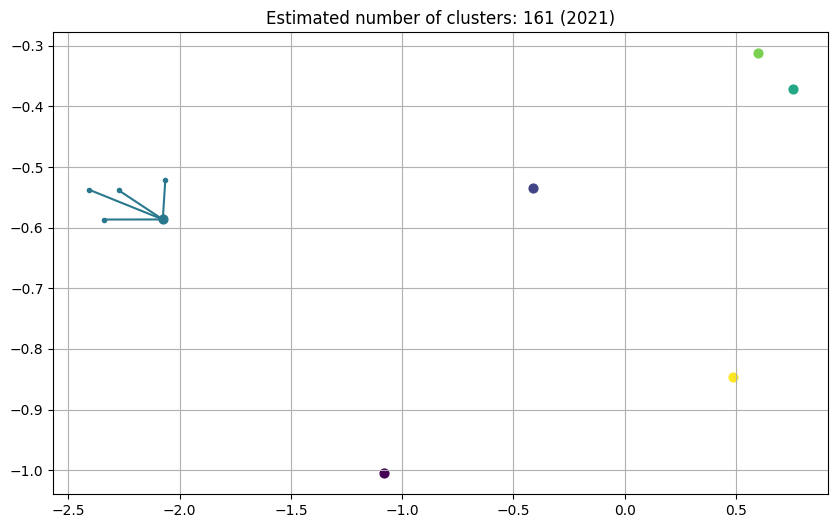

In [ ]:
for year, year_df in data_numeric.groupby(data_numeric.index.get_level_values('FisYear')):

  slice_df = year_df[svd_features]

  year_svd = run_svd(data = slice_df.copy(), n_components = 2)

  #print("-"*100)
  #year_svd.plot(kind = "scatter", x = "SVD_1", y = "SVD_2")
  #plt.title(year, fontsize = 15)
  #plt.show()
  #print("_"*100)

  random_state = find_best_af(data = year_svd)

  run_and_plot_af(data = year_svd, random_state = random_state, year = year)



In [ ]:
svd_features

['derivedEmissions',
 'emissionIntensity',
 'Energy Use Total',
 'ESG SCORE',
 'ESG Combined Score',
 'ESG Controversies Score',
 'Resource Use Score',
 'Emissions Score',
 'Environmental Innovation Score',
 'Workforce Score',
 'Human Rights Score',
 'Community Score',
 'Product Responsibility Score',
 'Management Score',
 'Shareholders Score',
 'CSR Strategy Score']

# SVD_esg and SVD_fund

In [ ]:
data_numeric = data_numeric.dropna()

In [ ]:
data_numeric.columns

Index(['derivedEmissions', 'CO2 Equivalents Emission Total',
       'CO2 Equivalents Emission Direct', 'CO2 Equivalents Emission Indirect',
       'emissionIntensity', 'Energy Use Total', 'ESG SCORE',
       'ESG Combined Score', 'ESG Controversies Score', 'Resource Use Score',
       'Emissions Score', 'Environmental Innovation Score', 'Workforce Score',
       'Human Rights Score', 'Community Score', 'Product Responsibility Score',
       'Management Score', 'Shareholders Score', 'CSR Strategy Score',
       'totalRevenue', 'totalAssets', 'employees', 'grossProfit',
       'operatingIncome', 'earningsBeforeTax', 'propertyPlantEquipmentTotal',
       'totalDebt', 'totalLiabilities', 'commonStock', 'netIncome', 'ebitda',
       'enterpriseValue', 'totalAssets/commonEquity', 'ebit/interest',
       'grossMargin', 'cf/sales', 'operatingMargin', 'roa', 'cogs/sales',
       'sales/employee', 'totalAssets/employee', 'capex/totalAssets',
       'capex/totalSales', 'capex', 'GDP PPP', 'econId

In [ ]:
svd_fund_features = ['totalRevenue', 'totalAssets', 'employees', 'grossProfit',
       'operatingIncome', 'earningsBeforeTax', 'propertyPlantEquipmentTotal',
       'totalDebt', 'totalLiabilities', 'commonStock', 'netIncome', 'ebitda',
       'enterpriseValue', "grossMargin", 'cf/sales', 'operatingMargin', 'roa', 'capex', 'GDP PPP']

In [ ]:
svd_esg_features = ['derivedEmissions', 'emissionIntensity', 'Energy Use Total', 'ESG SCORE',
                'ESG Combined Score', 'ESG Controversies Score', 'Resource Use Score',
                'Emissions Score', 'Environmental Innovation Score', 'Workforce Score',
                'Human Rights Score', 'Community Score', 'Product Responsibility Score',
                'Management Score', 'Shareholders Score', 'CSR Strategy Score']

In [ ]:
svd_fund = run_svd(data = data_numeric[svd_fund_features], n_components = 1)

In [ ]:
svd_esg = run_svd(data = data_numeric[svd_esg_features], n_components = 1)

In [ ]:
svd = pd.concat([svd_fund, svd_esg], axis = 1)
svd.columns = ["SVD_fund", "SVD_esg"]
svd

,,SVD_fund,SVD_esg
OrgId,FisYear,,
10836.0,2009,5.733615,-2.924490
13731.0,2009,4.328335,-1.616107
10364.0,2009,2.435629,-1.236898
11024.0,2009,-1.600934,-1.562588
148692.0,2009,-1.670239,-0.121620
...,...,...,...
114672164.0,2016,-1.703495,6.616035
114673484.0,2016,-0.649215,4.100803
114398854.0,2016,-1.769447,5.222456


2009


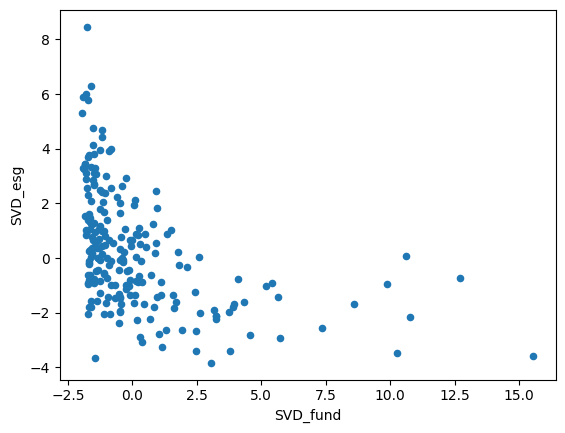

2010


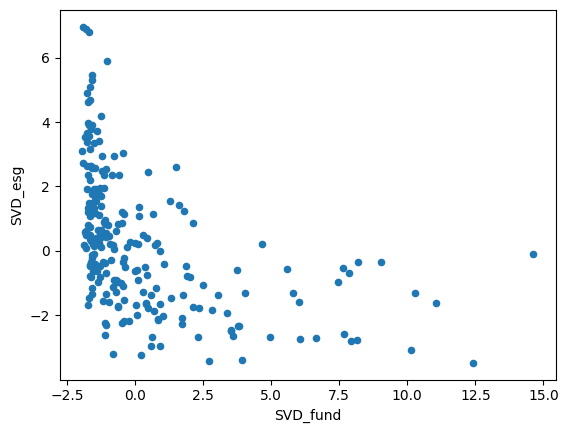

2011


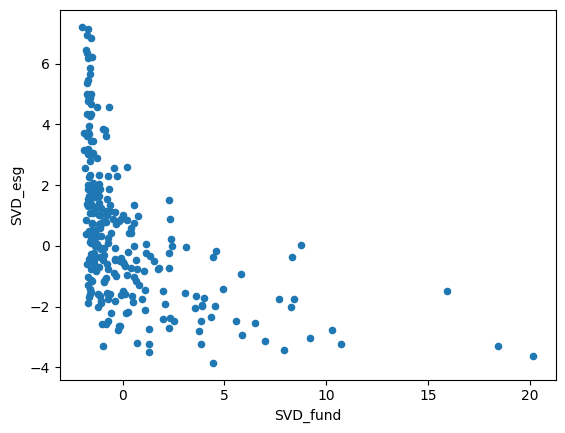

2012


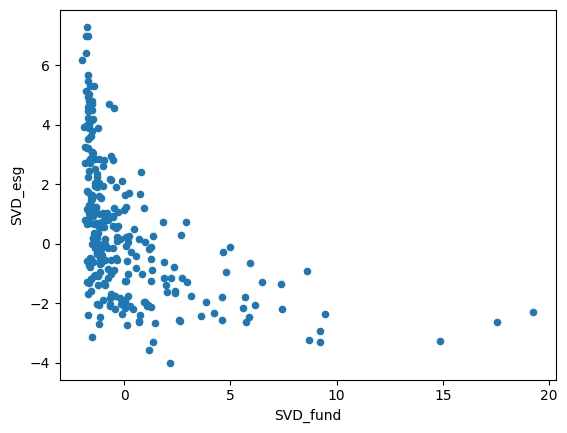

2013


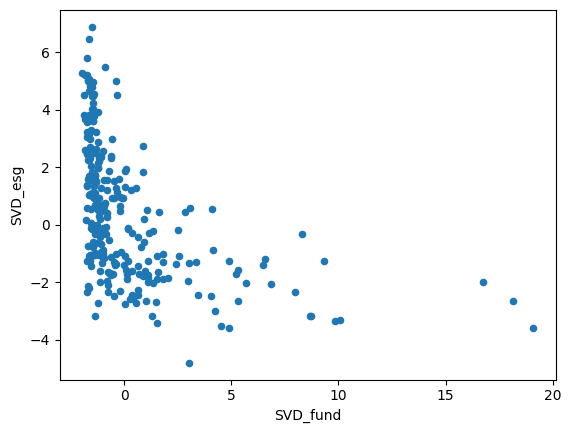

2014


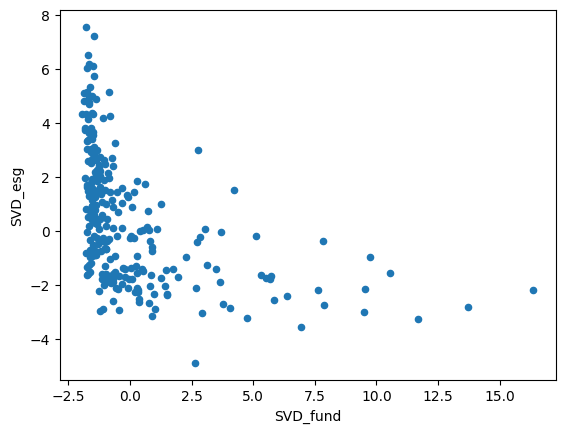

2015


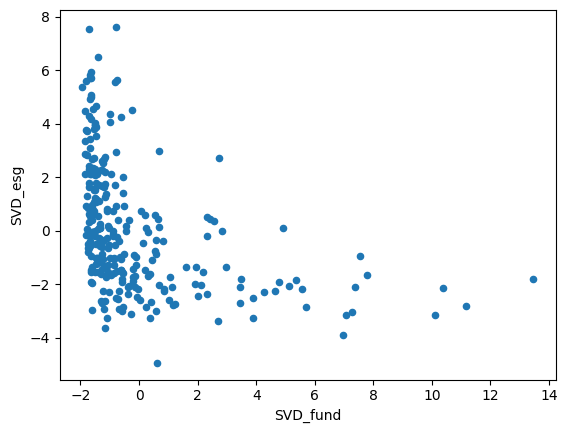

2016


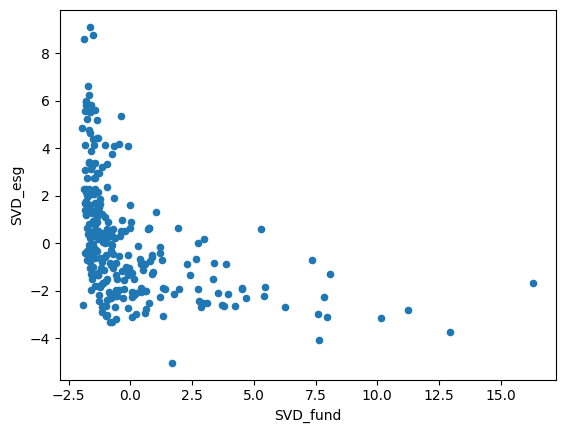

2017


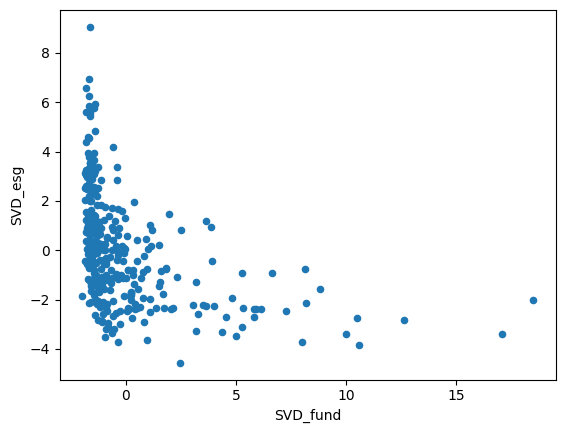

2018


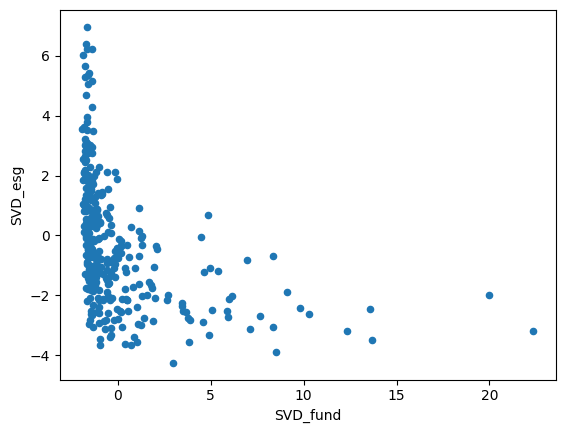

2019


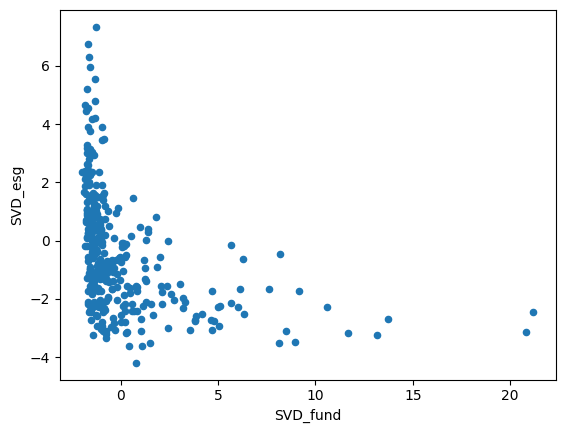

2020


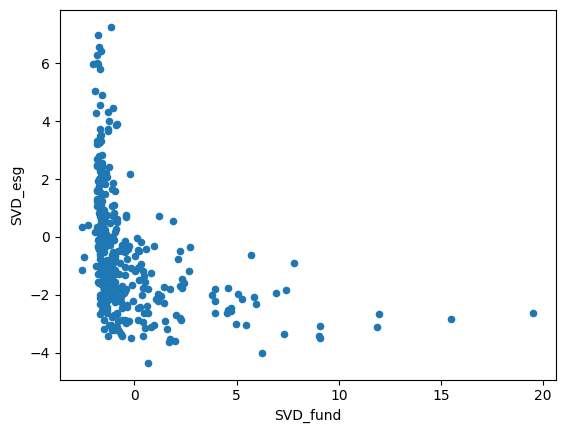

2021


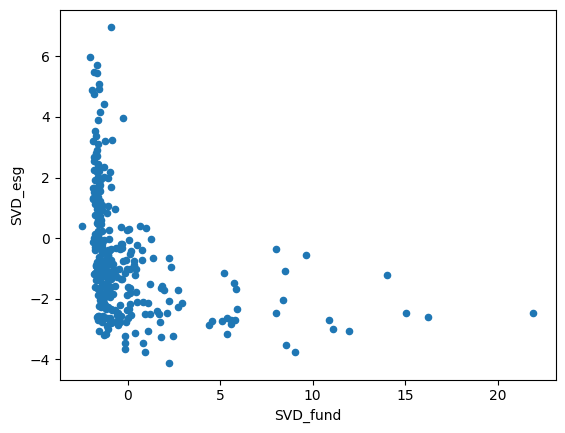

In [ ]:
import matplotlib.pyplot as plt

for year, year_df in svd.groupby(svd.index.get_level_values("FisYear")):
  print(year)
  year_df.plot(kind = "scatter", x = "SVD_fund", y = "SVD_esg")
  plt.show()

In [ ]:
svd_2018 = svd.loc[svd.index.get_level_values("FisYear") == 2018]

In [ ]:
find_best_af(data = svd_2018)

0

<Figure size 640x480 with 0 Axes>

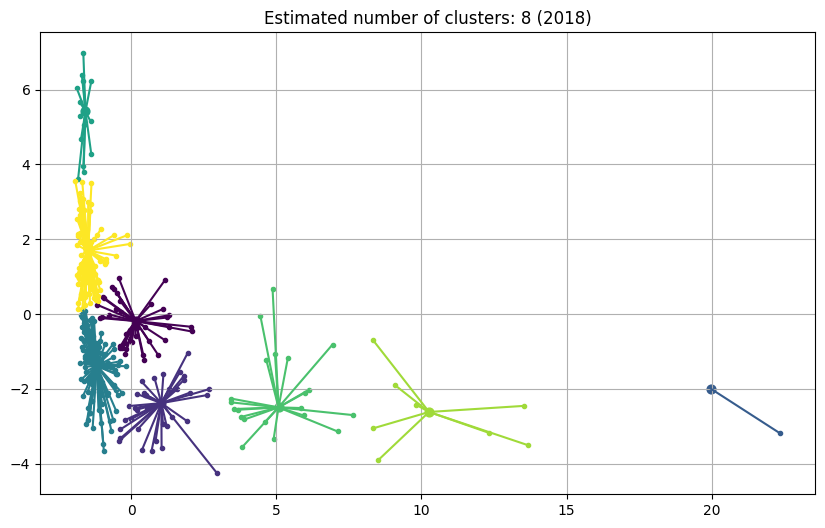

In [ ]:
labels = run_and_plot_af(data = svd_2018, random_state = 0, year = 2018)

In [ ]:
pd.DataFrame(data = labels, index = svd_2018.index, columns = ["cluster"])

,,cluster
OrgId,FisYear,
10836.0,2018,5
13731.0,2018,5
10364.0,2018,5
159008.0,2018,7
10775.0,2018,3
...,...,...
115771948.0,2018,7
13567.0,2018,3
107857985.0,2018,3


In [ ]:
len(svd_2018)

323

In [ ]:
final = pd.concat([svd_2018, pd.DataFrame(data = labels, index = svd_2018.index, columns = ["cluster"])], axis = 1)

In [ ]:
pd.pivot_table(data = final, index = "cluster", aggfunc = "mean")

,SVD_esg,SVD_fund
cluster,,
0,-0.261184,0.098692
1,-2.527731,0.937887
2,-2.590692,21.161625
3,-1.389924,-1.206415
4,5.260889,-1.634192
5,-2.110644,5.008761
6,-2.635950,10.437531
7,1.541175,-1.456110
